In [43]:
import modneat
import os
import statistics
from IPython.display import display, Image
import modneat.visualize as visualize
import random
from PIL import Image as PILImage

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_0/checkpoints/checkpoint-9
============================ infomation of  10 th generation ============================
dict_keys([1, 2])
 >> species id:  1
 created:  0
 last improved:  0
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.6722749228802947, 3.291480098270429e-06, 6.515199914555887e-07, 9.621949336683673e-08, 2.5740799500915467e-18]
member_num:  41
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  2.5740799500915467e-18
fitness_stddv:  1.2841581175822931
 number:  41


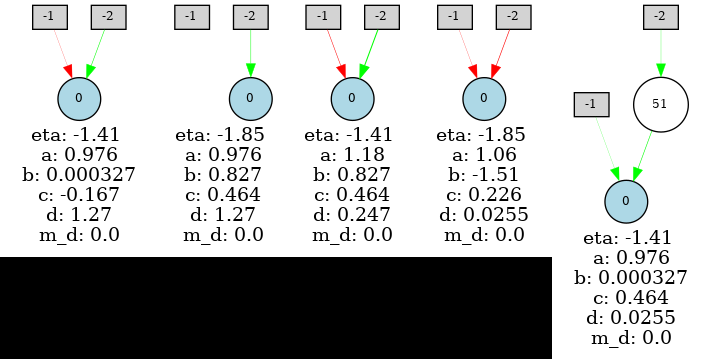

 >> species id:  2
 created:  4
 last improved:  5
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.2229342023252974, 0.10770501705972423, 6.60244015531354e-08, 3.8365460904669324e-10]
member_num:  59
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  3.8365460904669324e-10
fitness_stddv:  0.9396878019276075
 number:  59


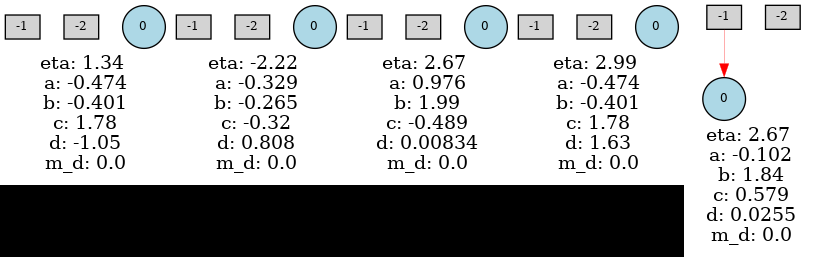

In [44]:
def investigate_checkpoint(checkpoint_path, is_display=False):
    print(checkpoint_path)
    generation = int(checkpoint_path.split('-')[-1])
    generation += 1
    print('============================ infomation of ', generation, 'th generation ============================')
    populations = modneat.Checkpointer.restore_checkpoint(checkpoint_path)
    s = populations.species
    species_num = len(s.species)
    species_id_set = s.species.keys()
    print(species_id_set)
    #singleSpeciesObject = list(s.species.items())[0][1]
    #print(singleSpeciesObject.members)
    for sid in species_id_set:

        #print species info
        print(' >> species id: ', sid)
        print(' created: ', s.species[sid].created) #when the species was created
        print(' last improved: ', s.species[sid].last_improved)
        fitness_list = s.species[sid].get_fitnesses()
        print( sorted(s.species[sid].get_fitnesses(), reverse=True))
        members = s.species[sid].members
        member_list = list(s.species[sid].members.values())
        member_list.sort(key=lambda x: x.fitness, reverse=True)

        print('member_num: ', len(member_list))
        print('best_fitness: ', member_list[0].fitness)
        print('median_fitness: ', member_list[int(len(member_list)*0.5)].fitness)
        print('worst_fitness: ', member_list[-1].fitness)
        print('fitness_stddv: ', statistics.stdev(fitness_list))

        best_member = member_list[0]
        top25_member = member_list[int(len(member_list)*0.25)]
        median_member = member_list[int(len(member_list)*0.5)]
        top75_member = member_list[int(len(member_list)*0.75)]
        worst_member = member_list[-1]

        print(' number: ', len(members))
        tmp_img_dir = './cache/g' + str(generation) + '/s' + str(sid) + '/'
        for g in members.items():
            if not os.path.exists(tmp_img_dir):
                os.makedirs(tmp_img_dir)
            visualize.draw_net(config = populations.config, genome=best_member, view=False, filename=tmp_img_dir + 'best')
            visualize.draw_net(config = populations.config, genome=top25_member, view=False, filename=tmp_img_dir + 'top25')
            visualize.draw_net(config = populations.config, genome=median_member, view=False, filename=tmp_img_dir + 'top50')
            visualize.draw_net(config = populations.config, genome=top75_member, view=False, filename=tmp_img_dir + 'top75')
            visualize.draw_net(config = populations.config, genome=worst_member, view=False, filename=tmp_img_dir + 'worst')

        #Create a compiled image
        image_paths = [tmp_img_dir + 'best.png', tmp_img_dir + 'top25.png', tmp_img_dir + 'top50.png', tmp_img_dir + 'top75.png', tmp_img_dir + 'worst.png']
        images = [PILImage.open(x) for x in image_paths]
        widths, heights = zip(*(i.size for i in images))
        total_width = sum(widths)
        max_height = max(heights)
        new_im = PILImage.new('RGB', (total_width, max_height))
        x_offset = 0
        for im in images:
            new_im.paste(im, (x_offset,0))
            x_offset += im.size[0]
        new_im.save(tmp_img_dir + 'compiled.png')
    
        if(is_display):
            disp_imaege = tmp_img_dir + '/compiled.png'
            display(Image(disp_imaege))
            
investigate_checkpoint('/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_0/checkpoints/checkpoint-9', is_display=True)

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-309
============================ infomation of  310 th generation ============================
dict_keys([17, 19, 18, 16])
 >> species id:  17
 created:  248
 last improved:  291
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.4010821311534441, 8.737095220091355e-24, 0.0, 0.0, 0.0, 0.0, 0.0]
member_num:  24
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  0.0
fitness_stddv:  1.8322556623339863
 number:  24


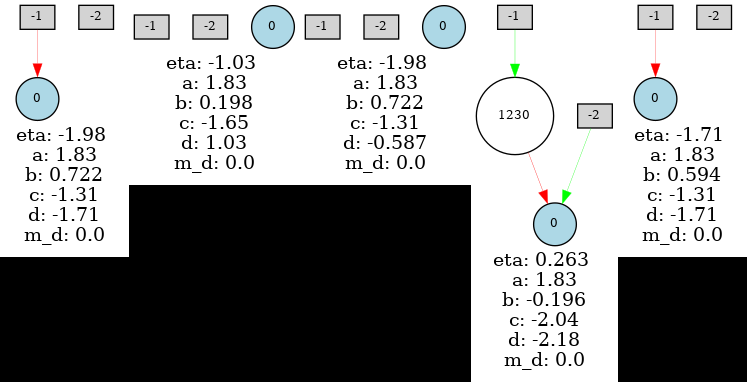

 >> species id:  19
 created:  283
 last improved:  287
[4.000097741652584, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.3603536266655402, 0.01986870830287559, 7.379299456487299e-07, 0.0, 0.0, 0.0]
member_num:  20
best_fitness:  4.000097741652584
median_fitness:  4.0
worst_fitness:  0.0
fitness_stddv:  1.8523669451046587
 number:  20


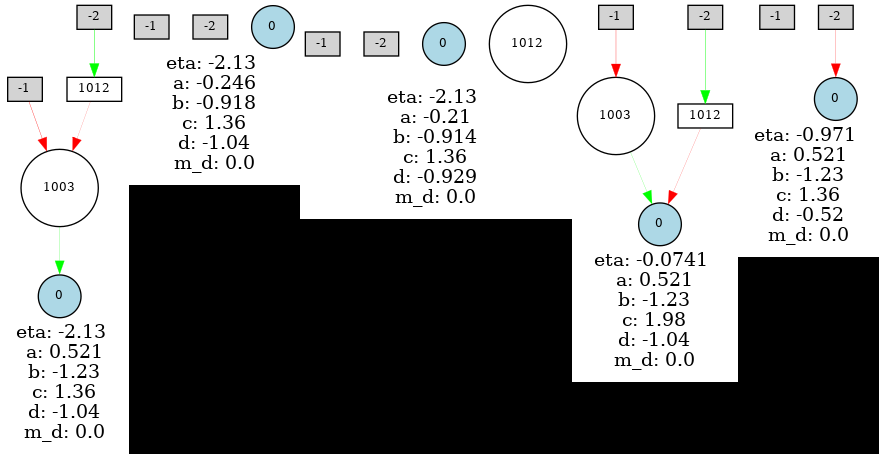

 >> species id:  18
 created:  267
 last improved:  304
[4.939532782040259, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.02799522986416197, 0.0006472748122625643, 3.4001281261596106e-07, 1.3858274927100732e-09, 1.869262126581393e-10]
member_num:  28
best_fitness:  4.939532782040259
median_fitness:  4.0
worst_fitness:  1.869262126581393e-10
fitness_stddv:  1.583693288880381
 number:  28


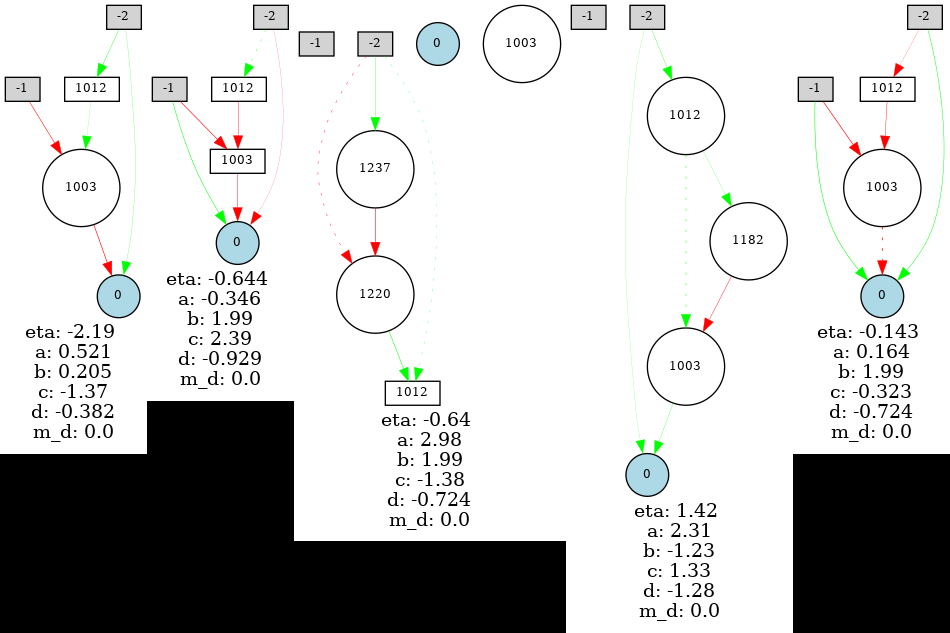

 >> species id:  16
 created:  246
 last improved:  307
[7.942399160053241, 6.765649498105977, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.582230245703794, 0.0012439073222378862, 0.0001610637977718939]
member_num:  29
best_fitness:  7.942399160053241
median_fitness:  4.0
worst_fitness:  0.0001610637977718939
fitness_stddv:  1.4259987846758295
 number:  29


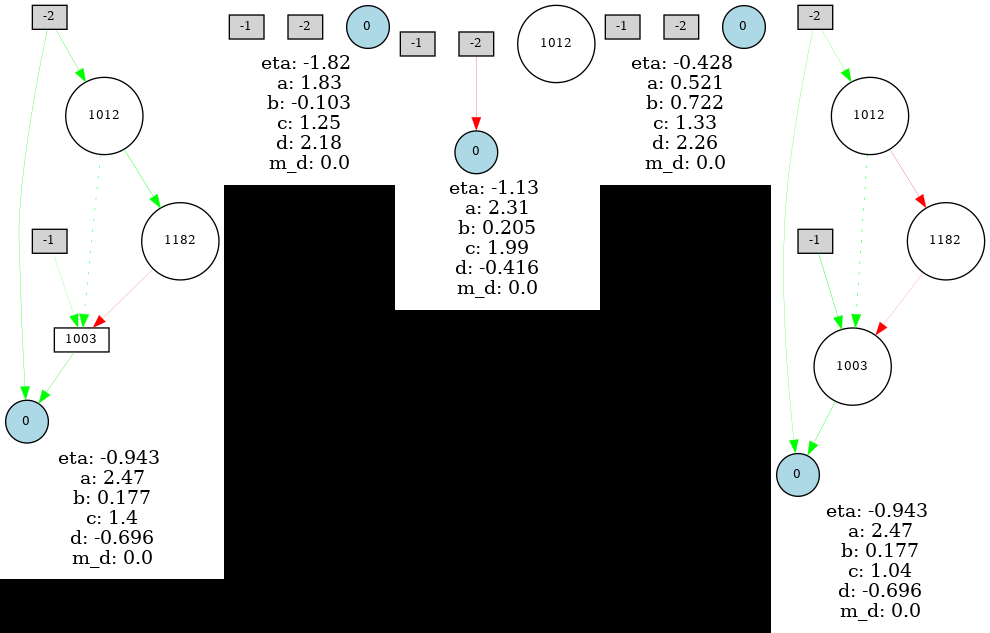

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-319
============================ infomation of  320 th generation ============================
dict_keys([17, 19, 18, 16])
 >> species id:  17
 created:  248
 last improved:  291
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
member_num:  20
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  4.0
fitness_stddv:  0.0
 number:  20


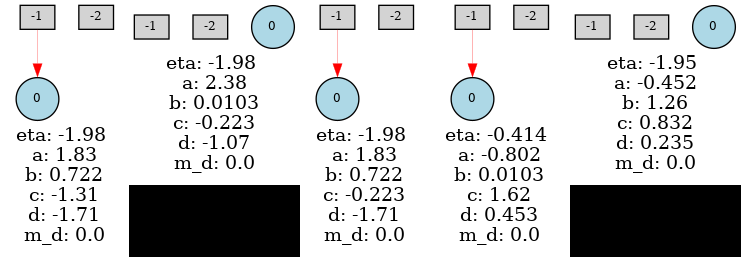

 >> species id:  19
 created:  283
 last improved:  287
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
member_num:  28
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  4.0
fitness_stddv:  0.0
 number:  28


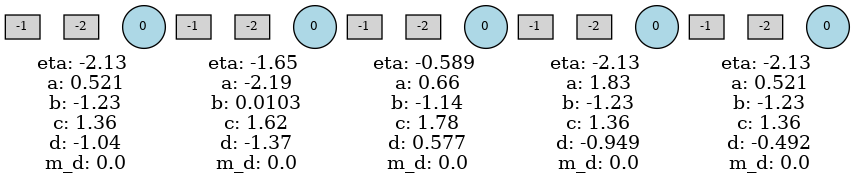

 >> species id:  18
 created:  267
 last improved:  304
[4.939532782040259, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.999946218953692, 0.3711823902766003, 0.00318822285807139, 0.003023954171928345, 8.982675543262892e-05, 6.378987222130272e-13]
member_num:  20
best_fitness:  4.939532782040259
median_fitness:  4.0
worst_fitness:  6.378987222130272e-13
fitness_stddv:  1.7851411494218006
 number:  20


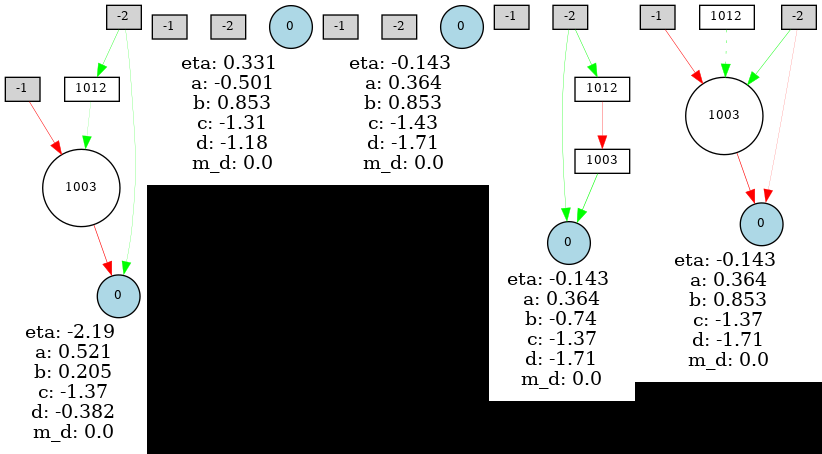

 >> species id:  16
 created:  246
 last improved:  311
[12.10958888068298, 9.834486012121634, 5.1629433185151585, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.9707898084709227, 0.5254303770892005, 0.30385832452523853, 0.04683713879022303, 0.018502556936432334, 0.008458345002293132, 0.004568759637810202, 0.001239709350849016, 0.0003121844865147974, 1.0530238536531968e-06, 2.6252790806250795e-10, 3.4997655426529523e-16]
member_num:  32
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  3.4997655426529523e-16
fitness_stddv:  2.836263836230002
 number:  32


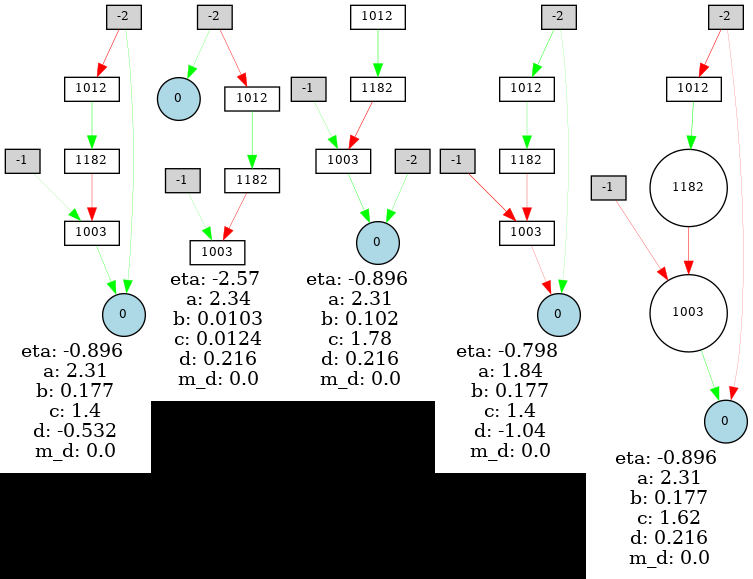

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-329
============================ infomation of  330 th generation ============================
dict_keys([17, 19, 16, 18])
 >> species id:  17
 created:  248
 last improved:  291
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0]
member_num:  21
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  0.0
fitness_stddv:  0.8728715609439696
 number:  21


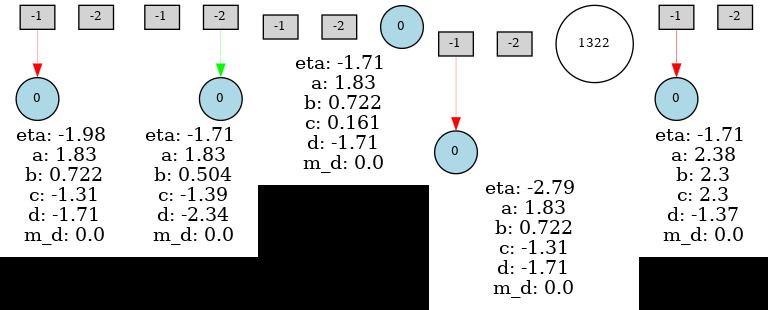

 >> species id:  19
 created:  283
 last improved:  287
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
member_num:  22
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  4.0
fitness_stddv:  0.0
 number:  22


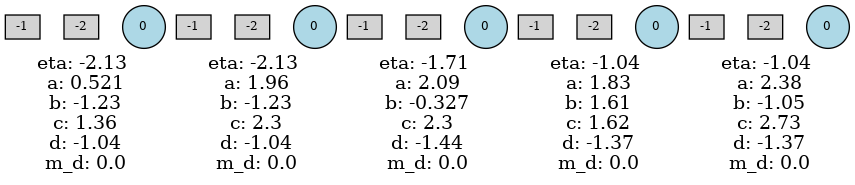

 >> species id:  16
 created:  246
 last improved:  311
[12.10958888068298, 4.024961729832833, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.771878350009568, 0.4092100674801995, 0.0006144792792835422]
member_num:  33
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  0.0006144792792835422
fitness_stddv:  1.7636390708605008
 number:  33


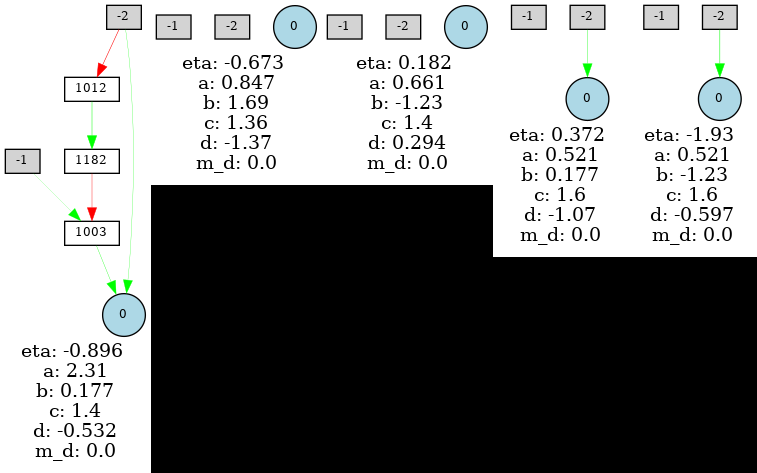

 >> species id:  18
 created:  267
 last improved:  323
[10.20621208952138, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.289124213468124, 1.2491859231411009, 0.10205761629612276, 0.016715690392482274, 0.005691760488044161, 2.8475847881000167e-06]
member_num:  25
best_fitness:  10.20621208952138
median_fitness:  4.0
worst_fitness:  2.8475847881000167e-06
fitness_stddv:  2.0686895854425926
 number:  25


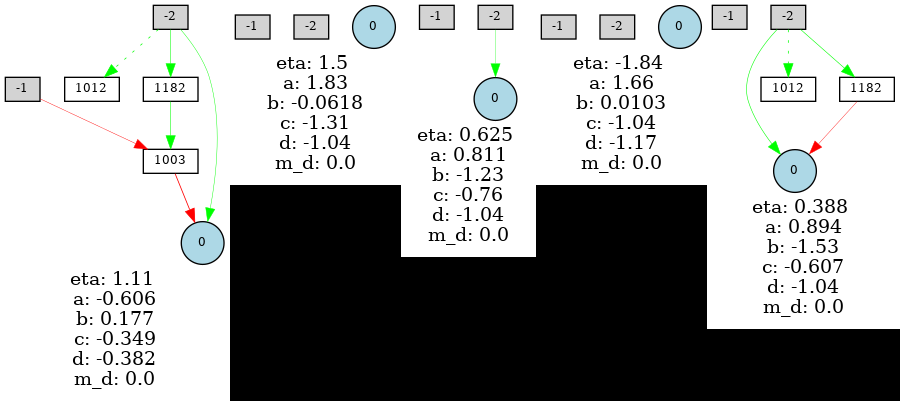

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-339
============================ infomation of  340 th generation ============================
dict_keys([17, 18, 16])
 >> species id:  17
 created:  248
 last improved:  291
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.048709793414476e-29, 0.0, 0.0, 0.0, 0.0, 0.0]
member_num:  27
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  0.0
fitness_stddv:  1.6946370914726467
 number:  27


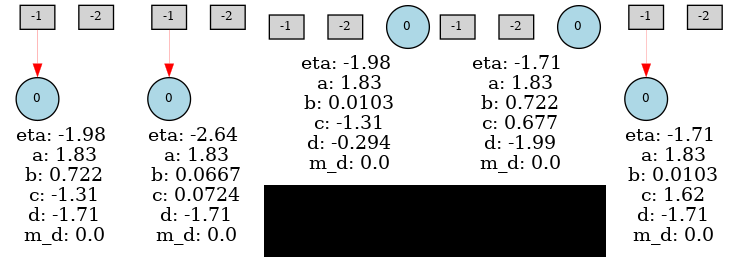

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 10.20621208952138, 7.398853173830808, 5.553974369647378, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.334174572701366, 0.027881820008951185, 0.0039098120048422095, 0.002367815100126738, 0.00193114538165824, 0.0006551056450919148, 8.596200731214697e-13, 2.0147518611521266e-14]
member_num:  45
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  2.0147518611521266e-14
fitness_stddv:  2.2786191602316634
 number:  45


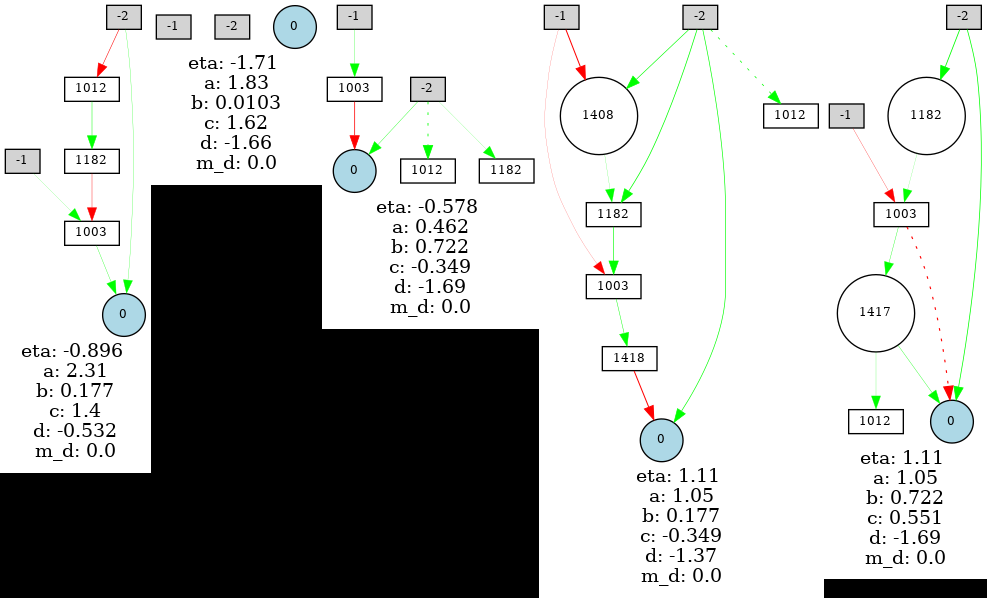

 >> species id:  16
 created:  246
 last improved:  311
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.03606847456567032, 7.974971556734505e-05, 3.520382164973932e-05, 1.1279013658289299e-05, 1.5928544212364918e-07, 2.6538548628533673e-08]
member_num:  28
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  2.6538548628533673e-08
fitness_stddv:  1.668913095259852
 number:  28


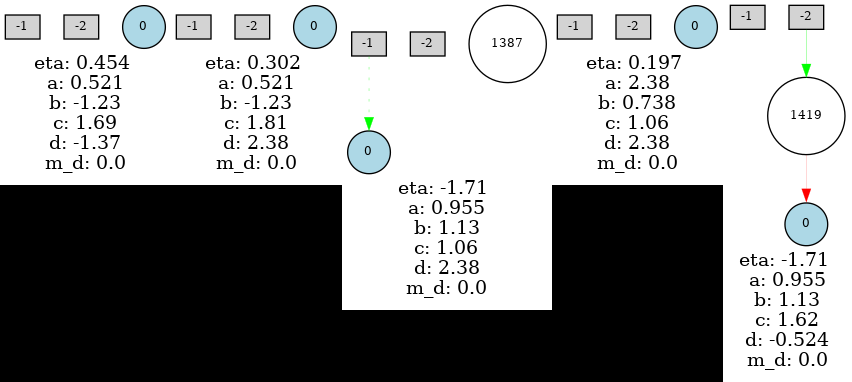

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-349
============================ infomation of  350 th generation ============================
dict_keys([18, 16])
 >> species id:  18
 created:  267
 last improved:  323
[10.20621208952138, 7.764317433077693, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.9561861333517516, 1.5545710458962019, 1.0910472538760985, 0.19131463697655943, 0.17749257470089094, 0.07292158259462898, 0.0021492257457641673, 0.0009680221546338728, 0.00044447400995821143, 0.0004420079253777148, 3.9022587189096497e-07, 2.3360217876948733e-08, 5.50095621581958e-17]
member_num:  47
best_fitness:  10.20621208952138
median_fitness:  4.0
worst_fitness:  5.50095621581958e-17
fitness_stddv:  2.0784337871299385
 number:  47


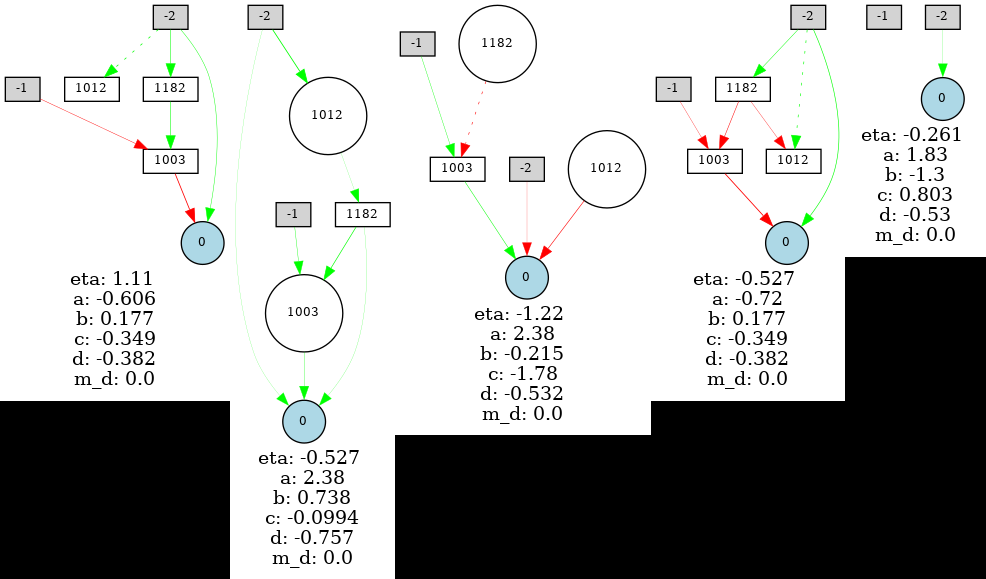

 >> species id:  16
 created:  246
 last improved:  311
[12.10958888068298, 6.487671646482421, 6.012782302230027, 4.4080692868212585, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.374859241030173, 1.100839586967156, 0.32676081582544614, 0.0681822617343139, 0.021693119788330776, 0.0009205518330185799, 0.00038447304814430964, 1.2264282259803748e-05, 4.2713709354086235e-06, 5.026035443320321e-10, 2.3323023112864335e-10, 1.154070272456924e-11, 3.164696206392863e-12]
member_num:  53
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  3.164696206392863e-12
fitness_stddv:  2.133777408000173
 number:  53


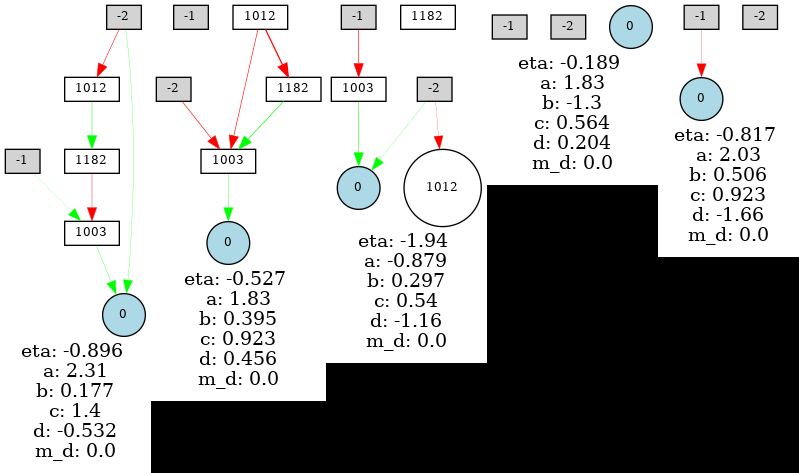

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-359
============================ infomation of  360 th generation ============================
dict_keys([18, 16])
 >> species id:  18
 created:  267
 last improved:  323
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0027843775950597872]
member_num:  42
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  0.0027843775950597872
fitness_stddv:  0.6167837610578906
 number:  42


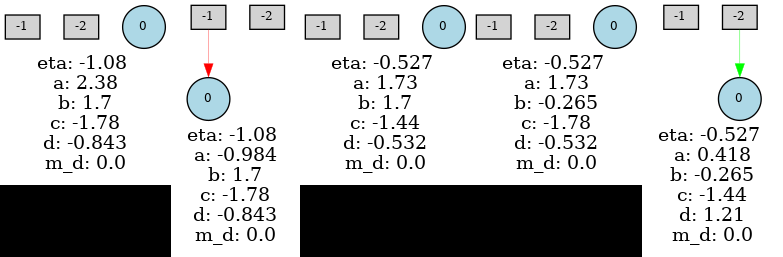

 >> species id:  16
 created:  246
 last improved:  311
[12.10958888068298, 10.20621208952138, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.512143860950804, 2.527425369270838, 0.7319352337901353, 0.612599421900512, 0.2192796185567586, 0.21722844352280848, 0.10840441904182158, 0.07183536461299413, 0.0028142735400635164, 0.00031661467955051276, 4.493269506941703e-06, 8.093960712098934e-07, 9.875271044466456e-10, 1.8084119481112578e-12, 1.3128144313876951e-12]
member_num:  58
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  1.3128144313876951e-12
fitness_stddv:  2.198554341910643
 number:  58


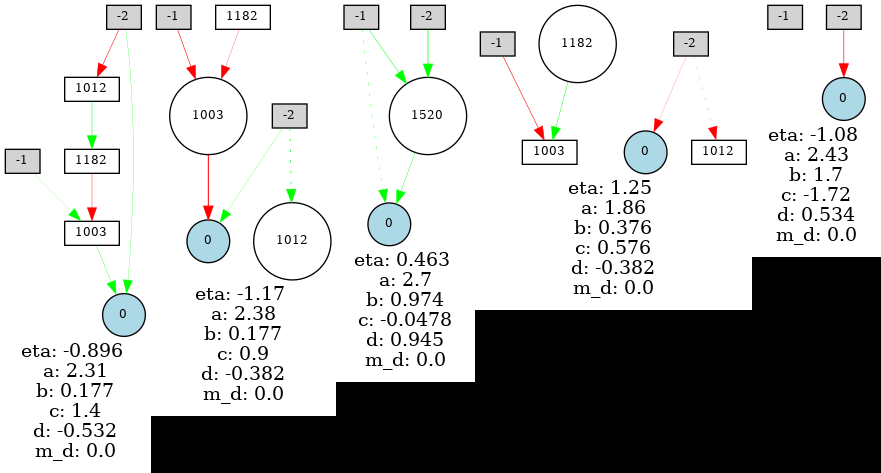

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-369
============================ infomation of  370 th generation ============================
dict_keys([18, 16])
 >> species id:  18
 created:  267
 last improved:  323
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.5326407220590952, 0.20828213330584558, 8.763809698855169e-07, 8.309358199595642e-12]
member_num:  36
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  8.309358199595642e-12
fitness_stddv:  1.2181008213365152
 number:  36


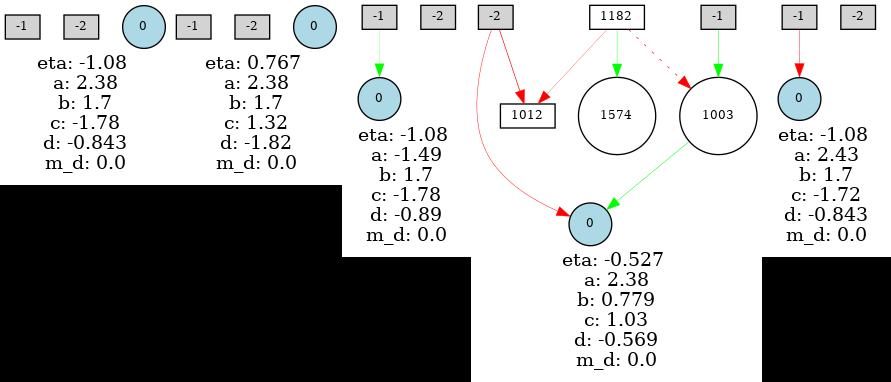

 >> species id:  16
 created:  246
 last improved:  311
[12.10958888068298, 10.20621208952138, 4.6030025070153116, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0046482219092954, 2.1521785540718397, 1.9641178538390143, 0.9344121914485906, 0.6150021650592125, 0.5341185281940881, 0.48078162192150525, 0.25371171099316037, 0.15736423941483813, 0.0620183499709538, 0.0345925120283119, 0.000995526994481483, 0.0007182843162092849, 2.0808523394332008e-08, 1.0061793772880278e-08, 5.345013383457964e-10, 1.8645597402664068e-10, 7.332489806418316e-12, 1.1774229065431023e-12]
member_num:  64
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  1.1774229065431023e-12
fitness_stddv:  2.203922719529587
 number:  64


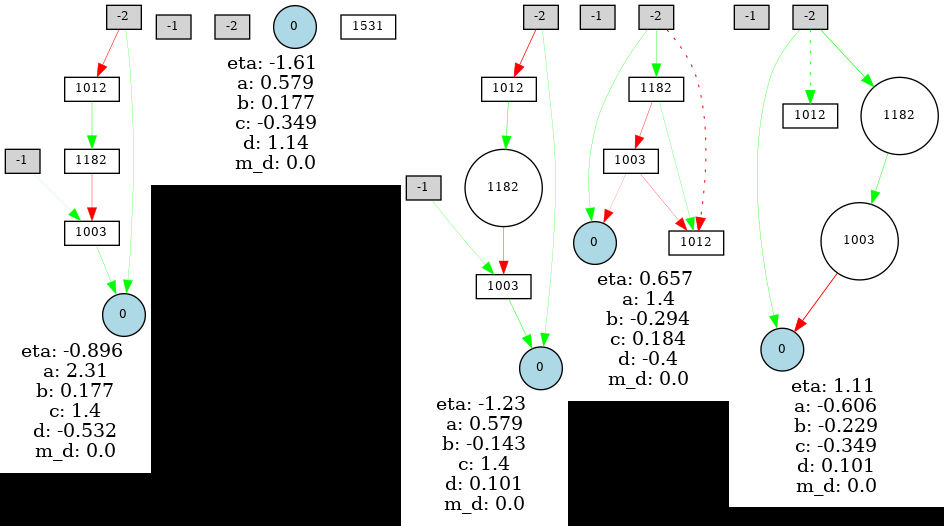

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-379
============================ infomation of  380 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[10.20621208952138, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.2062086101845313, 0.07783427590026312, 0.04864819153501389, 0.013756170611877845, 9.333243722793638e-07, 1.8115960187304146e-08, 9.160930215558887e-12, 1.3011836732688003e-12]
member_num:  44
best_fitness:  10.20621208952138
median_fitness:  4.0
worst_fitness:  1.3011836732688003e-12
fitness_stddv:  1.827602140437815
 number:  44


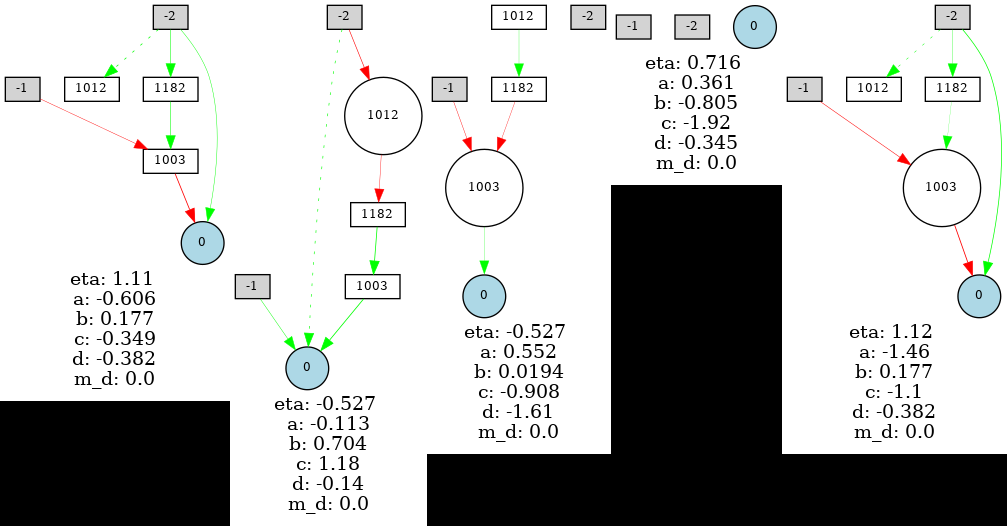

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 4.251194666983441, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.04776781043717579, 0.008945726364761404, 2.9055739528741076e-05, 4.058257880093487e-07, 8.582139130467904e-12]
member_num:  56
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  8.582139130467904e-12
fitness_stddv:  1.6123463802648548
 number:  56


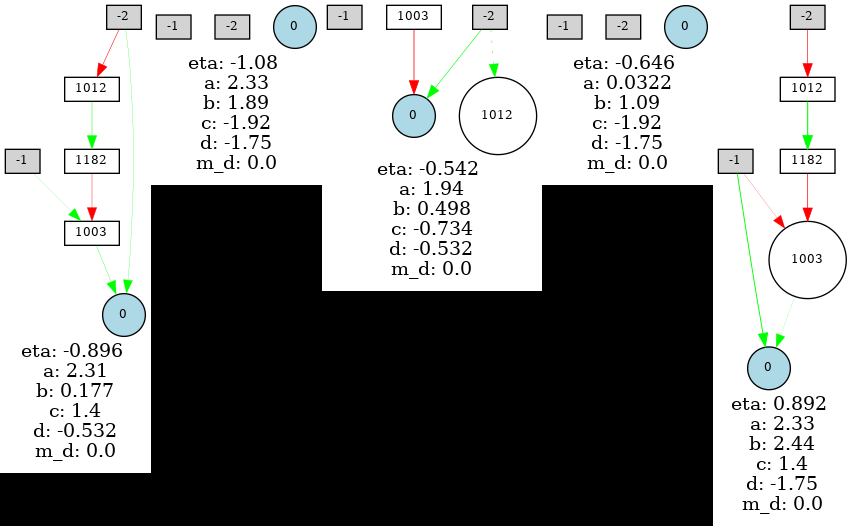

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-389
============================ infomation of  390 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.052321593189722675, 0.003339621495359355, 7.227305504882482e-06, 1.2318069508331124e-15, 1.4099997317306493e-21]
member_num:  46
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  1.4099997317306493e-21
fitness_stddv:  1.2553006630925814
 number:  46


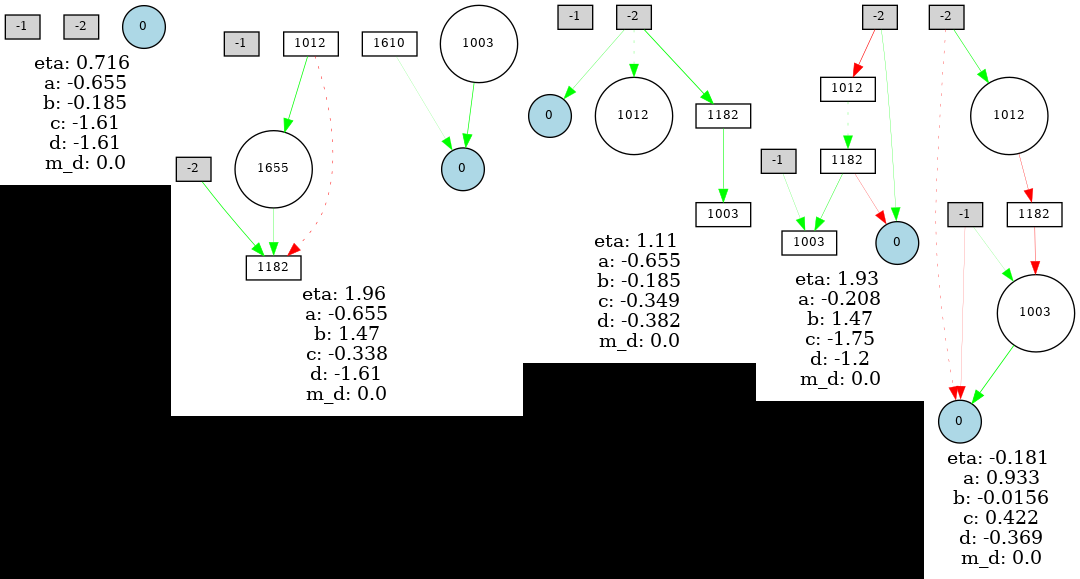

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 10.20621208952138, 7.286379352033157, 5.853324359437002, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.9644976466798318, 0.8803083667729434, 0.012398124326674437, 0.007990930366022095, 0.0007911579125652898, 1.6051060883301828e-05, 9.821441093864964e-07, 2.533434383483352e-08]
member_num:  54
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  2.533434383483352e-08
fitness_stddv:  2.0885280587468227
 number:  54


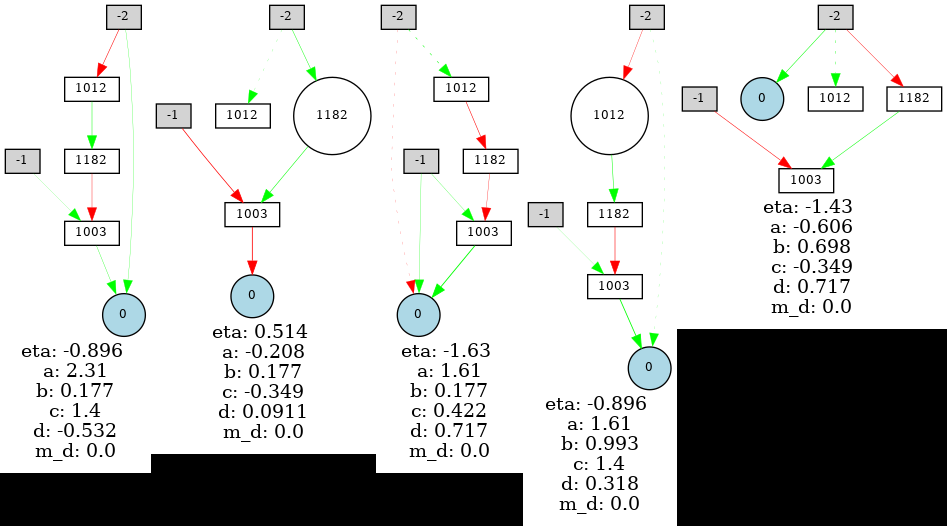

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-399
============================ infomation of  400 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[10.20621208952138, 4.771836493803634, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.906136685772081, 0.196977496650574, 0.1206229367859589, 0.05618751652959401, 0.023522908955894626, 0.0026962823115506377, 5.285514527373426e-07, 1.3647367949303658e-07, 2.0703635443667967e-12, 6.704234859723883e-21]
member_num:  67
best_fitness:  10.20621208952138
median_fitness:  4.0
worst_fitness:  6.704234859723883e-21
fitness_stddv:  1.5938859946879325
 number:  67


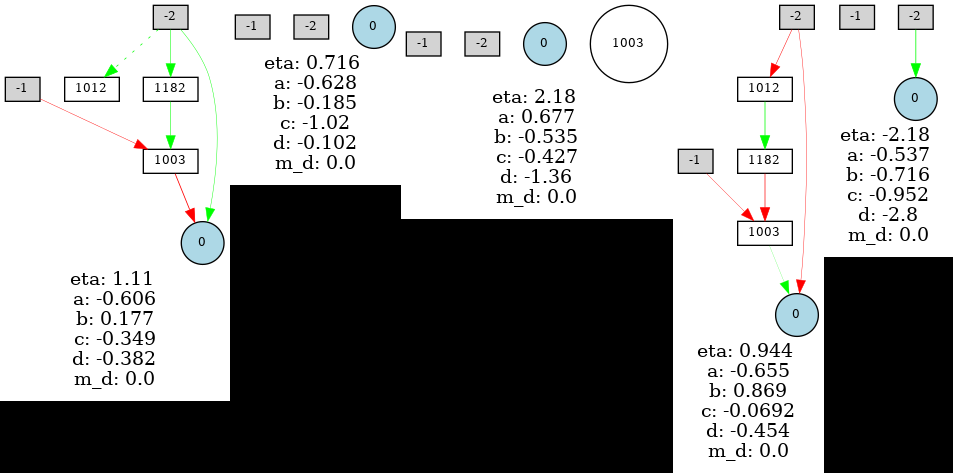

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.6222217750957523, 0.05145278215811752, 0.008811464375668274, 0.00849653942304769, 0.0014744277604222817, 0.0005633550039549996, 7.232897022647585e-11]
member_num:  33
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  7.232897022647585e-11
fitness_stddv:  2.2461310875908795
 number:  33


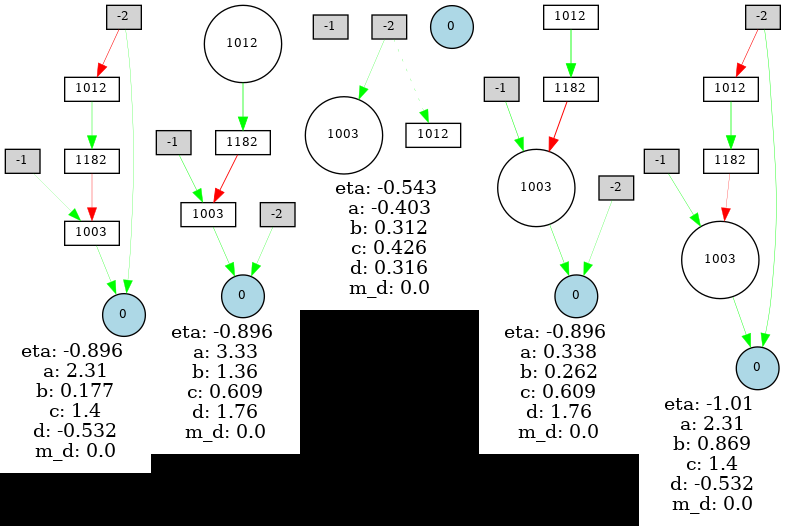

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-409
============================ infomation of  410 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[10.20621208952138, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.6011938111659545, 0.8182343344831513, 0.06739260986103945, 8.987387558197415e-05, 7.642596260940133e-08, 4.749276081407856e-10, 1.6831842144933374e-16]
member_num:  56
best_fitness:  10.20621208952138
median_fitness:  4.0
worst_fitness:  1.6831842144933374e-16
fitness_stddv:  1.5207851161505757
 number:  56


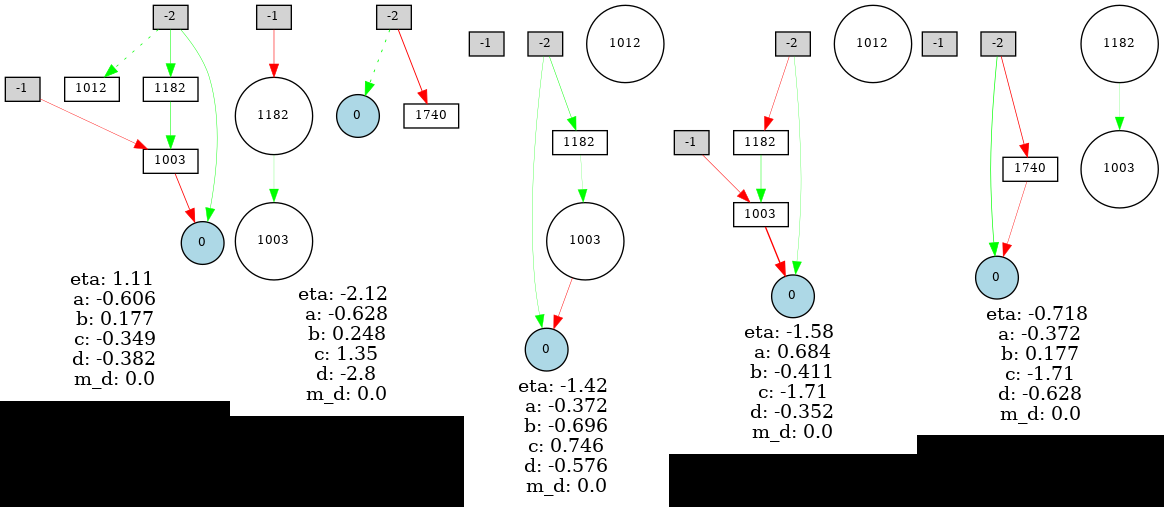

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.9985465206060693, 0.34489882066823724, 0.00042525494544216885, 5.197565155898e-06, 3.726467726833561e-10]
member_num:  44
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  3.726467726833561e-10
fitness_stddv:  1.7626785571116017
 number:  44


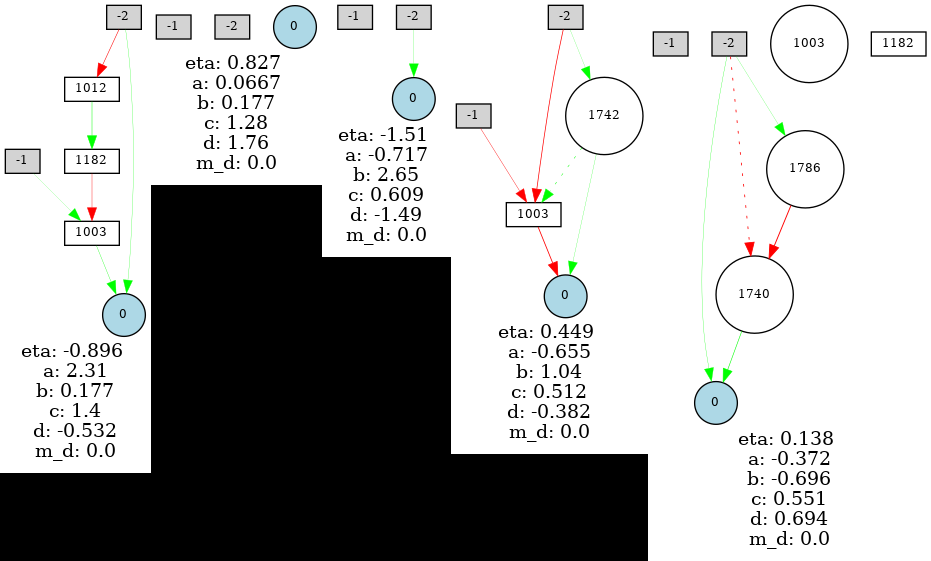

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-419
============================ infomation of  420 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[10.20621208952138, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.38281667452386214, 0.030651063794727464, 0.0013877998513538447, 0.0012214901708535479, 1.7364089964114355e-07, 1.0174761629805816e-16]
member_num:  50
best_fitness:  10.20621208952138
median_fitness:  4.0
worst_fitness:  1.0174761629805816e-16
fitness_stddv:  1.5990829374856916
 number:  50


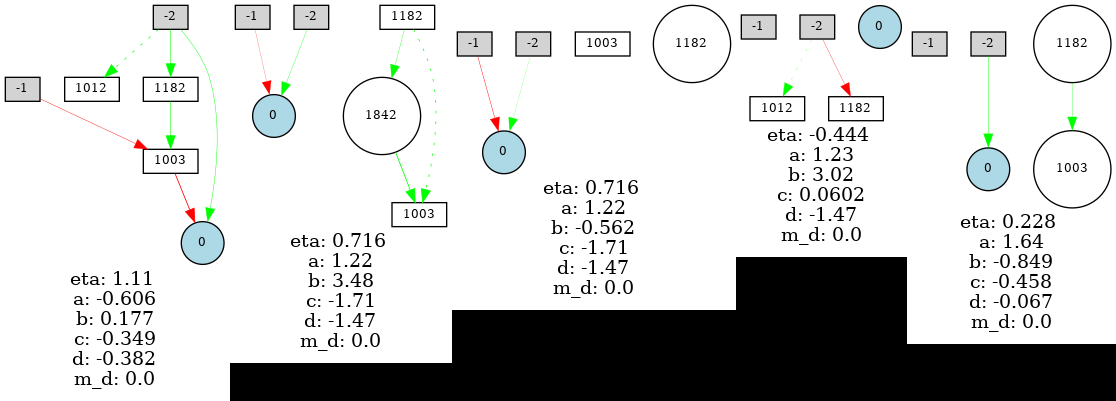

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.255833926338853, 0.08603699291538965, 0.010656776263171238]
member_num:  50
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  0.010656776263171238
fitness_stddv:  1.4596688748471218
 number:  50


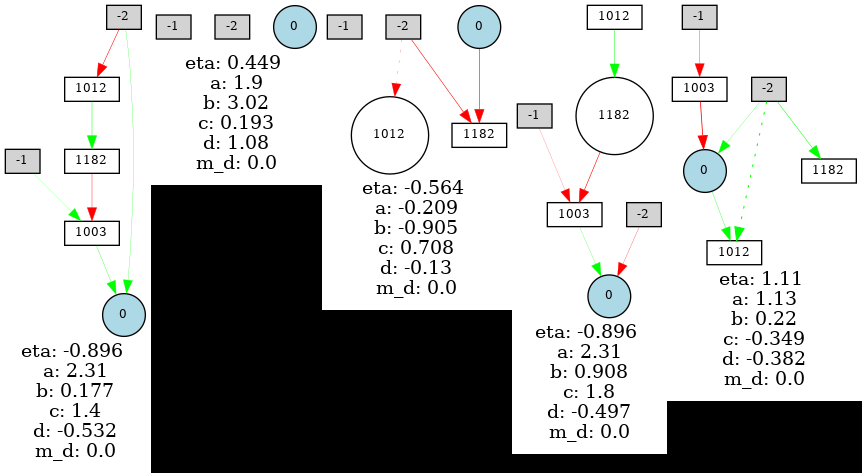

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-429
============================ infomation of  430 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.004740500779500629, 0.0011748074470189335, 5.8242853894785476e-05, 4.799804746175969e-05, 3.5417096513791767e-06, 4.0548100572776104e-13, 3.172545252887264e-14, 5.8751959069284e-16, 2.901541230874981e-17]
member_num:  61
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  2.901541230874981e-17
fitness_stddv:  1.4301109075854865
 number:  61


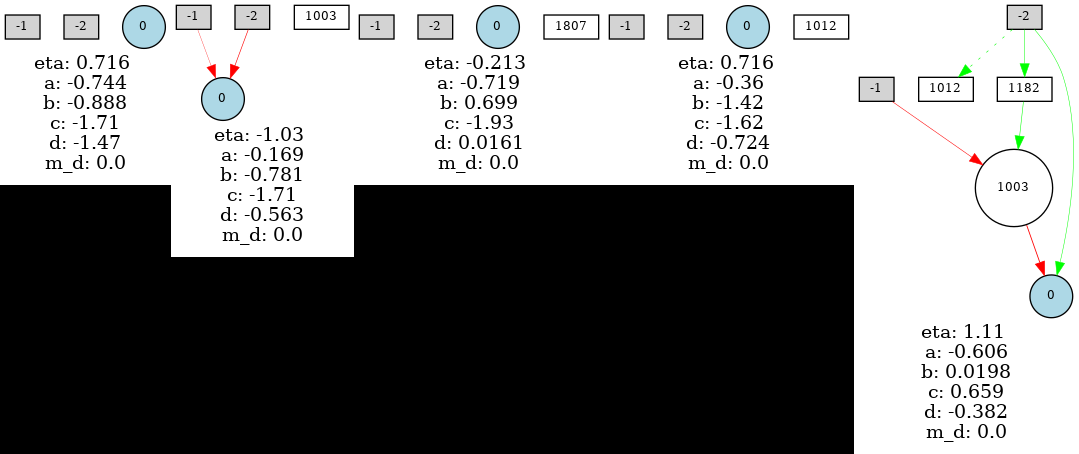

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 10.20621208952138, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.8594039076333044, 1.468522909067888, 1.0928463250277214, 0.5741363693032889, 0.26381161280345194, 0.0004876921310888448, 0.0003215688804001539, 4.505693422941941e-05]
member_num:  39
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  4.505693422941941e-05
fitness_stddv:  2.2563077900516837
 number:  39


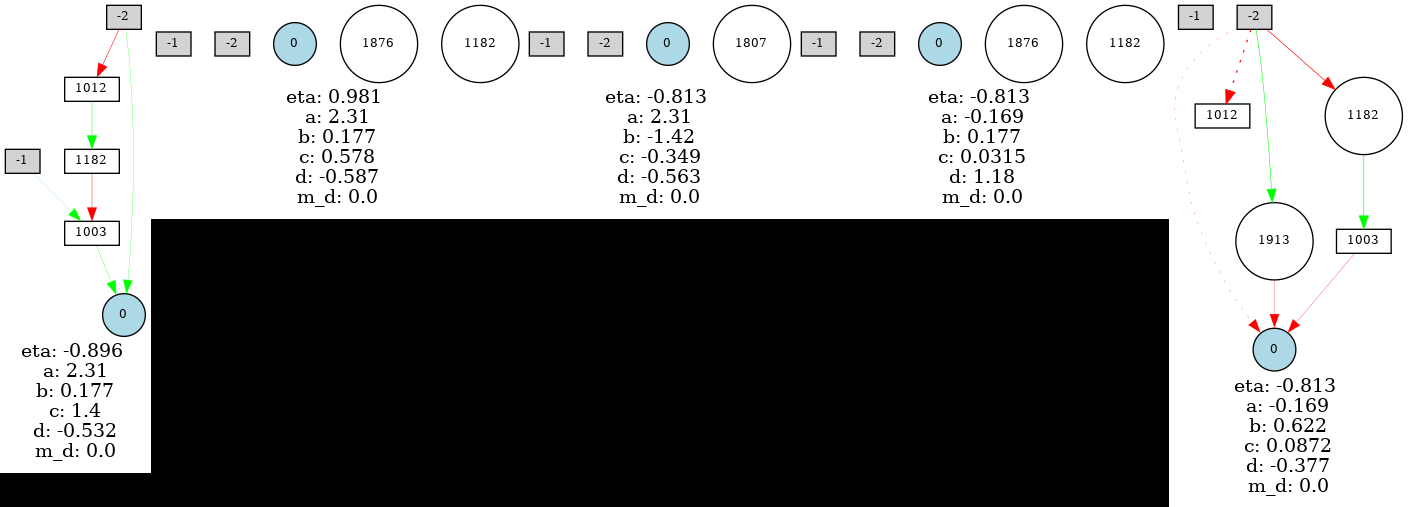

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-439
============================ infomation of  440 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[10.20621208952138, 5.993598879109156, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.7358058343716247, 1.233594595767383, 0.08064457002390667, 0.03448763276027603, 0.005894186815525685, 0.0005404338323818055, 0.0002439239348313375, 3.605512670370983e-07, 7.115725358517716e-14]
member_num:  49
best_fitness:  10.20621208952138
median_fitness:  4.0
worst_fitness:  7.115725358517716e-14
fitness_stddv:  1.7902772684115915
 number:  49


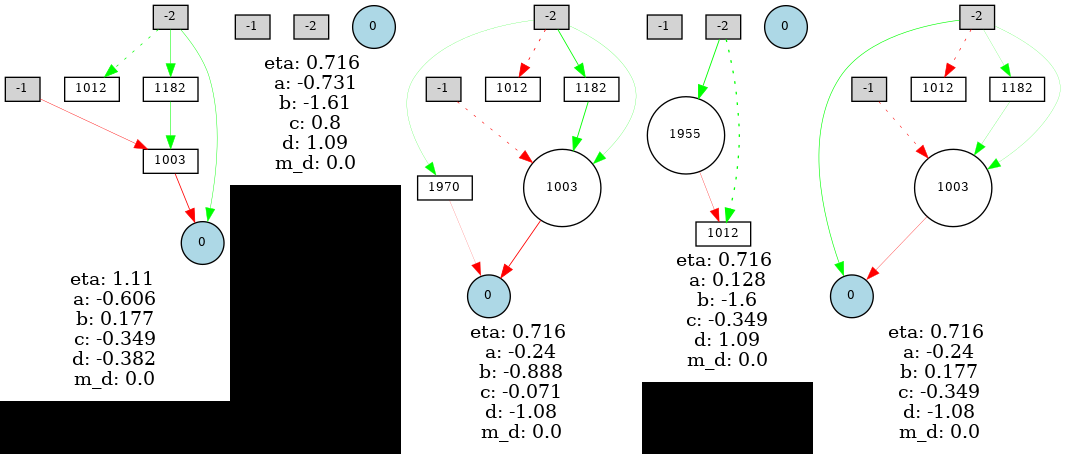

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.9346931470288989, 0.05640094126150052, 0.041391048308326746, 0.00024744607426717495, 1.1293857798780036e-05, 1.1077002575513581e-05, 7.474114417257412e-06, 3.855708217709261e-06, 3.503452099996479e-08, 1.5562569508312697e-08]
member_num:  51
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  1.5562569508312697e-08
fitness_stddv:  1.9985563361603587
 number:  51


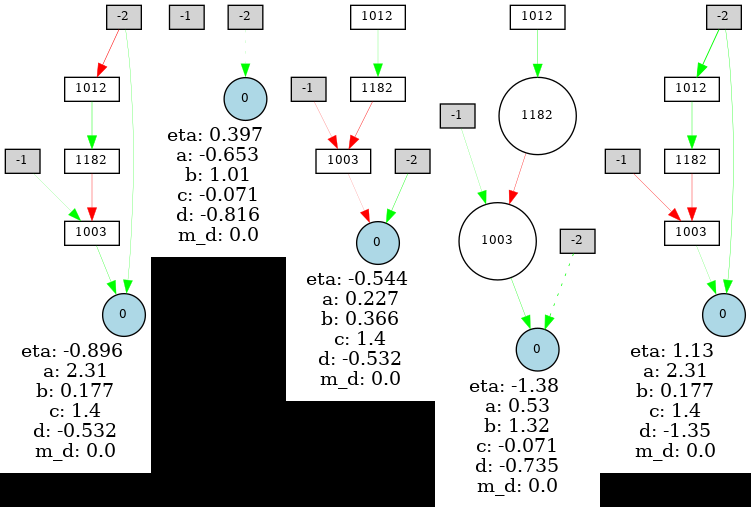

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-449
============================ infomation of  450 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
member_num:  33
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  4.0
fitness_stddv:  0.0
 number:  33


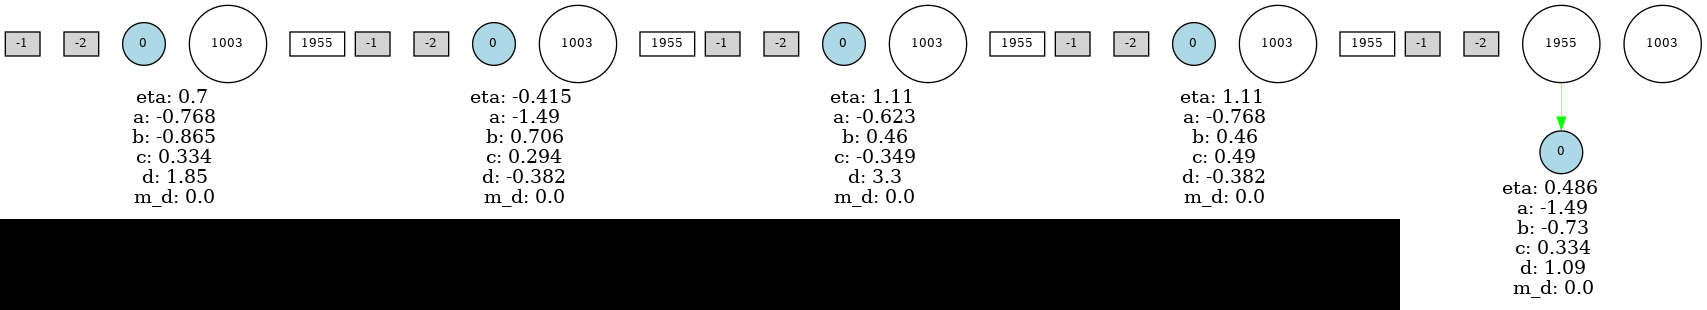

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 10.319180543174966, 10.20621208952138, 8.74010035403163, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.9536214958482447, 3.113346459703117, 1.6180383266029021, 0.37063781377191946, 0.040102655789149864, 0.016921568369887136, 0.0062478217088041, 0.00452828669768449, 0.0020824816691498334, 0.0020514807762221014, 0.00018734983329814353, 8.825431073822448e-05, 7.570674310584091e-05, 2.6384051930167116e-05, 1.9283294099013106e-05, 1.408781981572228e-06, 1.0887304337288646e-07, 1.3793438309593216e-08, 1.8554511432246776e-10]
member_num:  67
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  1.8554511432246776e-10
fitness_stddv:  2.4619506821090704
 number:  67


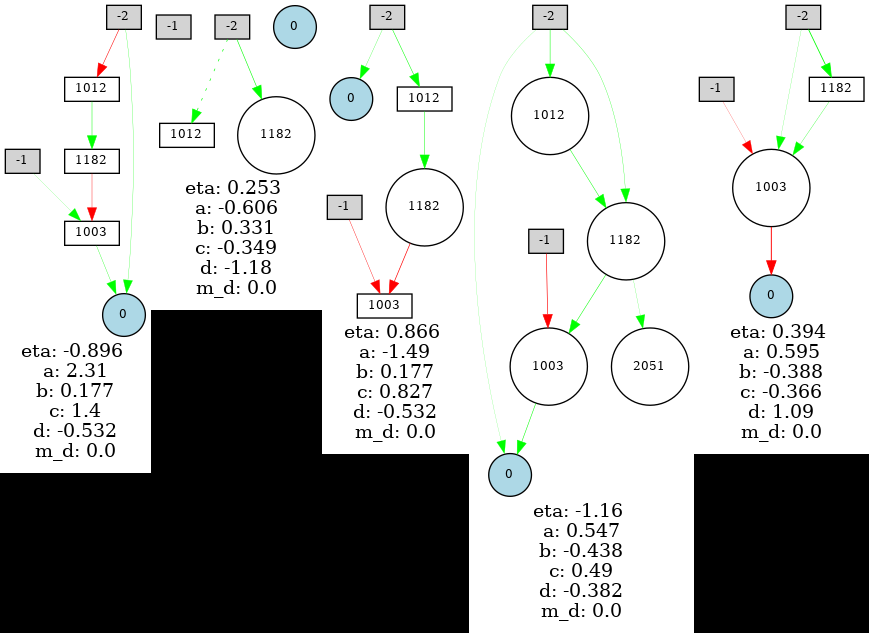

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-459
============================ infomation of  460 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.2886947899570134e-17]
member_num:  42
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  1.2886947899570134e-17
fitness_stddv:  0.6172133998483676
 number:  42


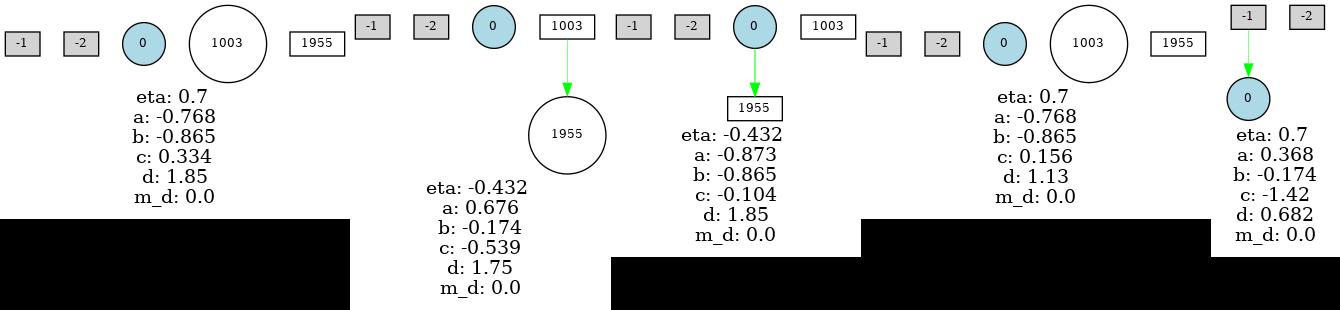

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 10.319180543174966, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.9582630358948894, 2.850894657845267, 6.164621822353586e-06, 1.5368842069675764e-07, 9.112893701282264e-10, 1.7009954944238085e-10, 5.905564043965822e-15, 3.165595083758848e-15]
member_num:  58
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  3.165595083758848e-15
fitness_stddv:  1.8811987756305004
 number:  58


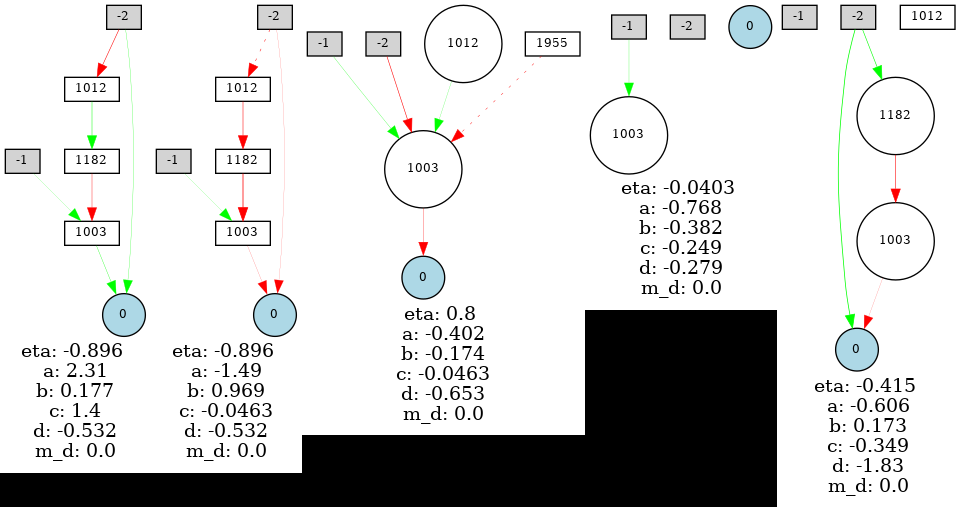

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-469
============================ infomation of  470 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.00014635109267698595, 1.834343545552282e-08, 1.0993215556798386e-11, 5.0344572612129784e-21]
member_num:  54
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  5.0344572612129784e-21
fitness_stddv:  1.057392441223991
 number:  54


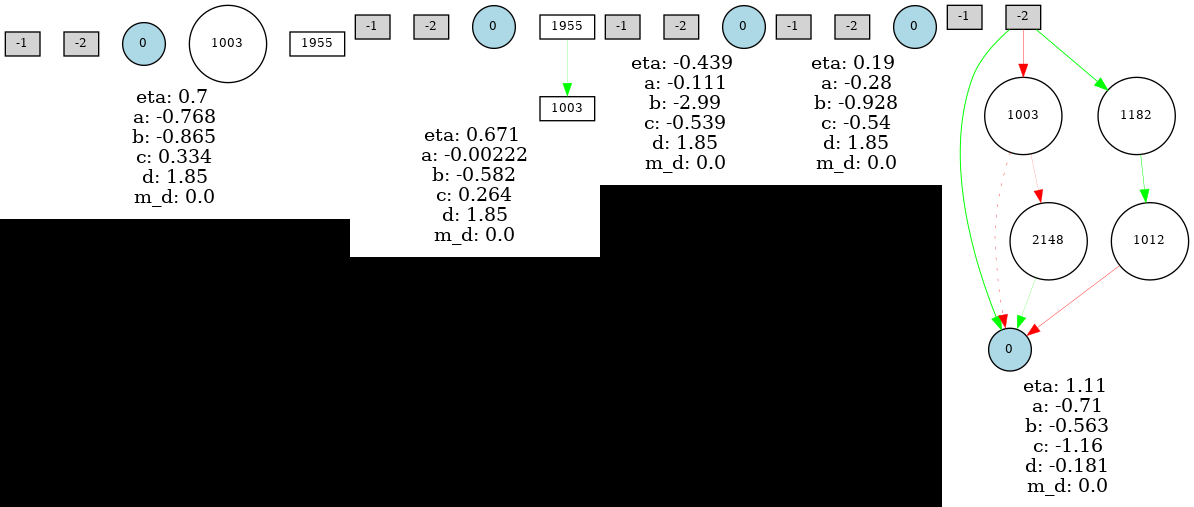

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 10.319180543174966, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.8929592869259193, 2.1521785540718397, 2.0156286128259167, 1.0852467741546175, 0.7442354816159052, 0.32852973210903685, 0.3075658113858084, 0.18064718605446003, 1.9569318751670226e-06, 2.19776368629021e-07, 3.706400786830138e-08, 1.0148858419235825e-09, 2.364284701921736e-12, 3.332846587239589e-13, 2.6177341165485805e-13, 4.0316021009968124e-19, 6.92802401104754e-21]
member_num:  46
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  6.92802401104754e-21
fitness_stddv:  2.4851374321997803
 number:  46


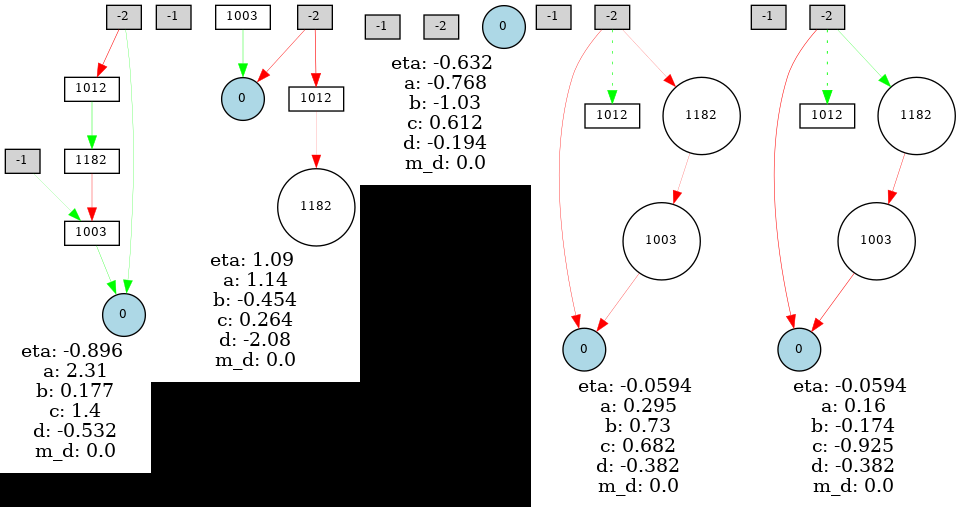

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-479
============================ infomation of  480 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.19641439383192172, 0.00023921133754010196, 3.8490495836360495e-05, 2.5367067130853315e-07]
member_num:  54
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  2.5367067130853315e-07
fitness_stddv:  1.044664260631752
 number:  54


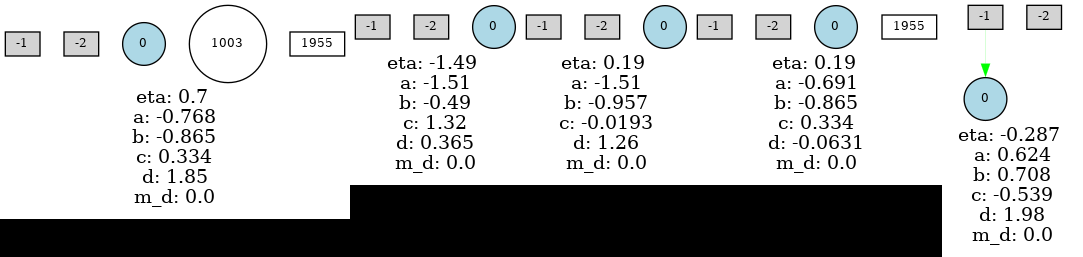

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 10.319180543174966, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.382902571304844, 1.9510693818273652, 0.5272298289807462, 0.38309350074939263, 0.321062358316878, 0.12156454871943843, 0.0025665279067136845, 0.002102672883396648, 0.00011478303633112743, 4.1579779691675565e-05, 4.762273983164546e-06, 7.081545916880891e-08, 2.1832877618353357e-09, 1.5548473523121388e-10]
member_num:  46
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  1.5548473523121388e-10
fitness_stddv:  2.429034603888953
 number:  46


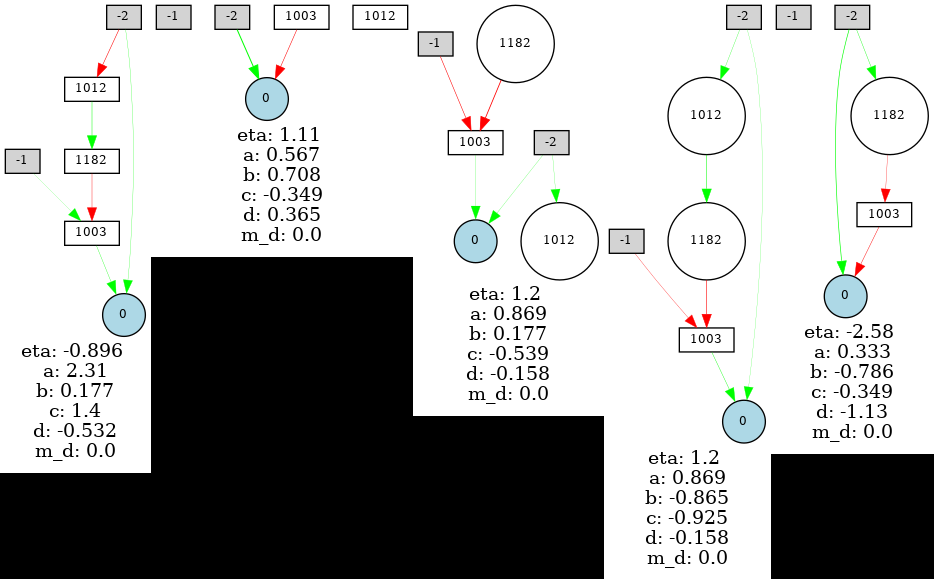

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-489
============================ infomation of  490 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.112156599071273e-12, 4.479841303405228e-14]
member_num:  51
best_fitness:  4.0
median_fitness:  4.0
worst_fitness:  4.479841303405228e-14
fitness_stddv:  0.7841568470554741
 number:  51


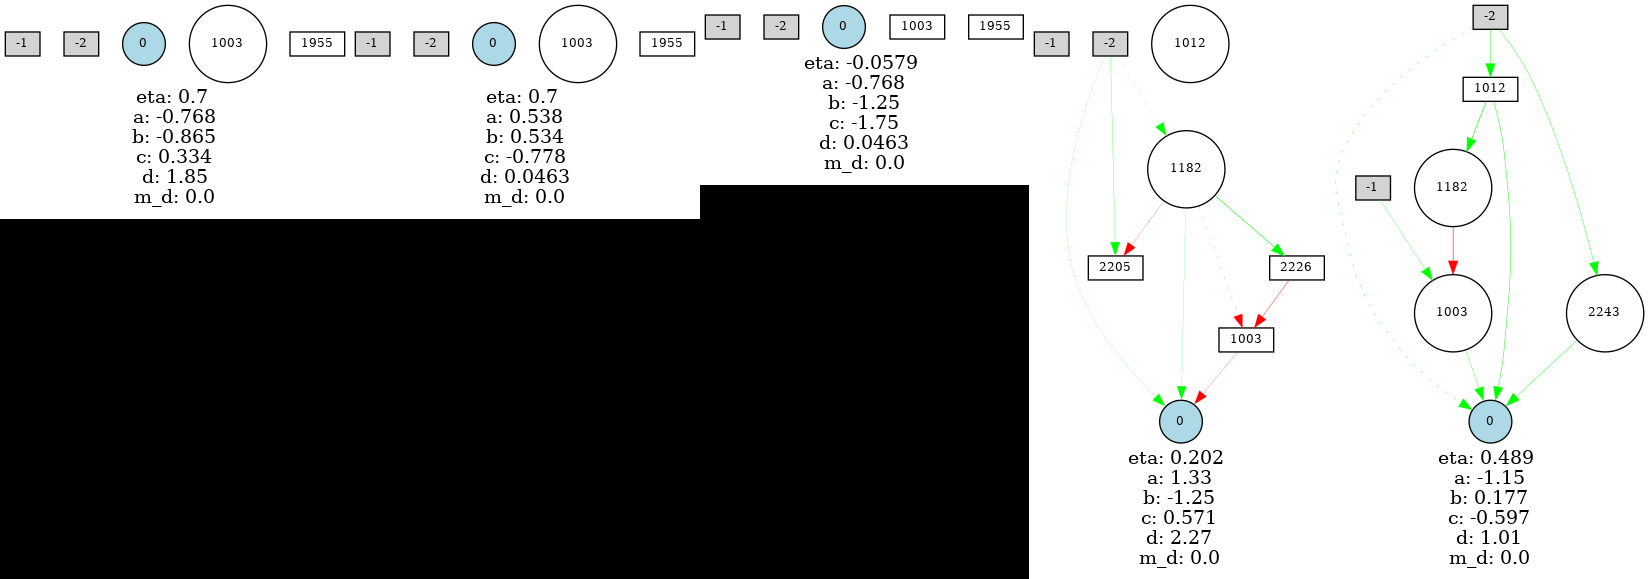

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 10.319180543174966, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.209930673429204, 2.254814442259501, 2.0290945884107376, 0.4509208710958259, 0.17070765939447247, 0.11173494692075854, 0.05437880497327487, 0.050064641949125195, 0.04764618422110081, 0.001157261082402092, 0.0008884342476306399, 7.419331792456605e-23]
member_num:  49
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  7.419331792456605e-23
fitness_stddv:  2.224180187560625
 number:  49


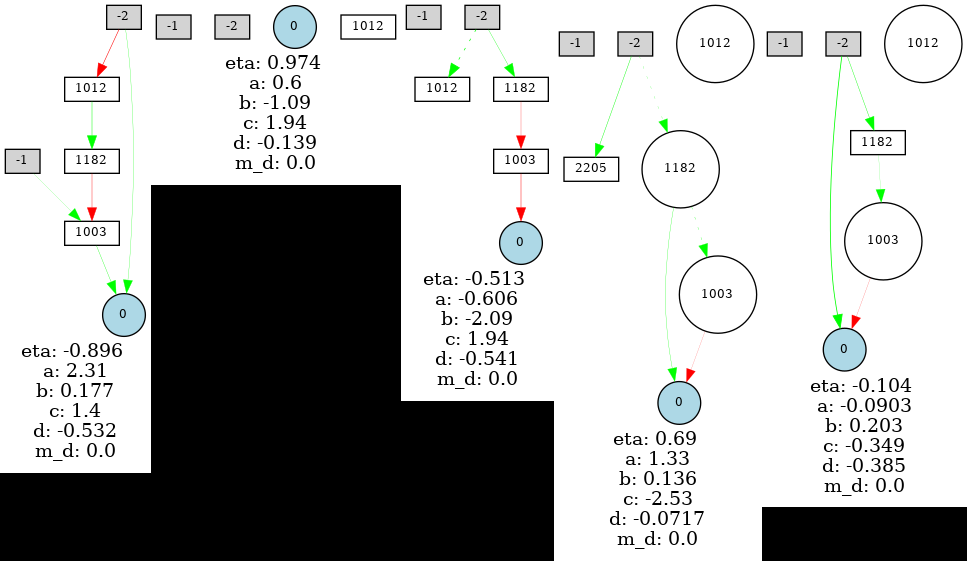

/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints/checkpoint-499
============================ infomation of  500 th generation ============================
dict_keys([16, 18])
 >> species id:  16
 created:  246
 last improved:  311
[10.319180543174966, 4.158609488954403, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.2192584925249939, 1.1279534831884208, 1.0303373198667602, 0.06487156781077227, 0.05531201516970522, 0.00019070107296991105, 7.121544365260461e-07, 9.829491084402225e-10, 1.911661457512981e-10, 1.3717455428387288e-12, 2.4449846851618733e-13, 1.0454917151207029e-17]
member_num:  57
best_fitness:  10.319180543174966
median_fitness:  4.0
worst_fitness:  1.0454917151207029e-17
fitness_stddv:  1.804932793976818
 number:  57


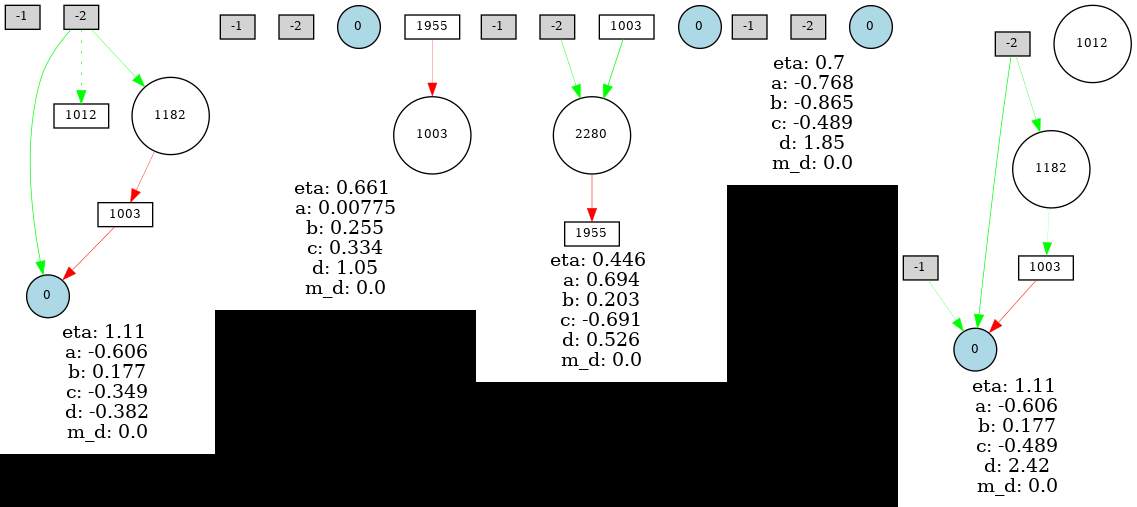

 >> species id:  18
 created:  267
 last improved:  323
[12.10958888068298, 4.231324760406533, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.8696730857076136, 1.8806253596419713, 0.7218686159203674, 0.4260547936407273, 0.08827883068922154, 0.07324460145026673, 0.05993143775100262, 0.048991299540658374, 0.00040941781485444805, 3.4548063532311914e-05, 5.25554238323273e-06, 1.9363896512872005e-06, 6.938748543697342e-07, 7.944705727755526e-08, 3.721970748359658e-08, 1.1511303244986579e-08, 7.144443519816434e-13]
member_num:  43
best_fitness:  12.10958888068298
median_fitness:  4.0
worst_fitness:  7.144443519816434e-13
fitness_stddv:  2.3625074295838844
 number:  43


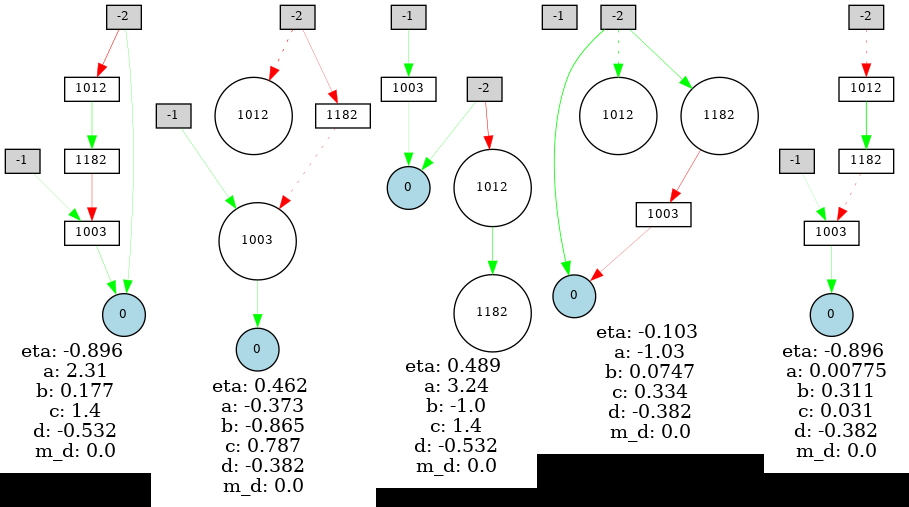

In [48]:
# checkpoints/ディレクトリを指定
checkpoint_dir = '/home/ubuntu/Projects/modneat-python/tmp_test_learning/non_static_example/non_static_ModExHebbFFN_4/checkpoints'

interval = 1
cnt=0

#チェックポイント内のcheckpointのパスを取得
for checkpoint in sorted(os.listdir(checkpoint_dir), key=lambda x: int(x.split('-')[-1])):
    if cnt%interval==0:
        # checkpointのパスを取得
        checkpoint_path = os.path.join(checkpoint_dir, checkpoint)
        investigate_checkpoint(checkpoint_path, is_display=True)
    cnt+=1